FIFA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from squarify import normalize_sizes, plot as squarify_plot


In [2]:

# Load datasets
players_data = pd.read_csv('WorldCupPlayers.csv')
cups_data = pd.read_csv('WorldCups.csv')
matches_data = pd.read_csv('WorldCupMatches.csv')

# Clean and preprocess data
cups_data['Attendance'] = cups_data['Attendance'].str.replace('.', '', regex=False).astype(int)
matches_data = matches_data.dropna(subset=['Year'])
matches_data['Year'] = matches_data['Year'].astype(int)


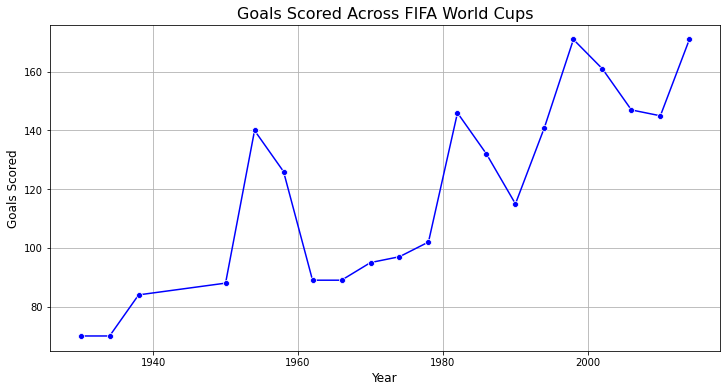

In [3]:

# Goals scored over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=cups_data, x='Year', y='GoalsScored', marker='o', color='blue')
plt.title("Goals Scored Across FIFA World Cups", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Goals Scored", fontsize=12)
plt.grid(True)
plt.show()


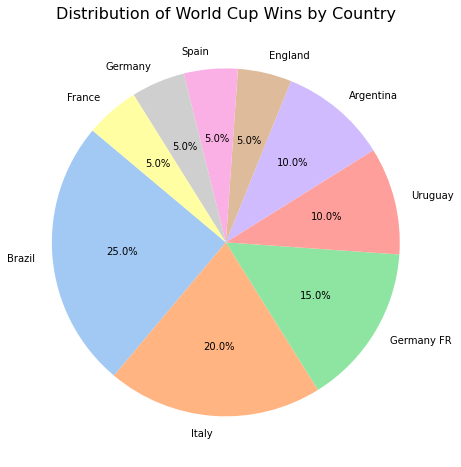

In [4]:
# 1. Pie Chart: Distribution of World Cup Wins by Country
plt.figure(figsize=(8, 8), facecolor='white')  # Set background color to white
cups_data['Winner'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of World Cup Wins by Country", fontsize=16)
plt.ylabel('')
plt.show()


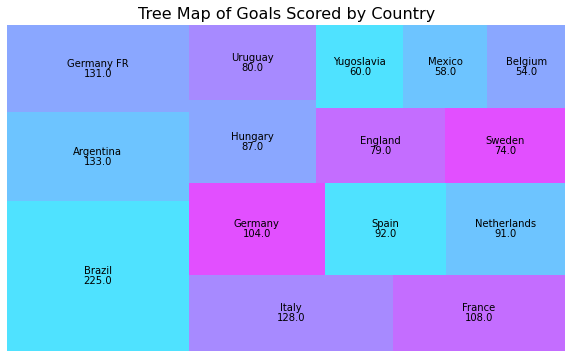

In [8]:

# 2. Tree Map: Goals Scored by Country
goals_by_country = matches_data.groupby('Home Team Name')['Home Team Goals'].sum() + matches_data.groupby('Away Team Name')['Away Team Goals'].sum()
goals_by_country = goals_by_country.sort_values(ascending=False).dropna().head(15)

sizes = normalize_sizes(goals_by_country.values, 100, 100)
plt.figure(figsize=(10, 6))
squarify_plot(sizes, label=goals_by_country.index, value=goals_by_country.values, alpha=0.8, color=sns.color_palette('cool'))
plt.title("Tree Map of Goals Scored by Country", fontsize=16)
plt.axis('off')
plt.show()


In [9]:

# 3. Geographic Map: Total Goals by Hosting Country
geo_data = cups_data.groupby('Country')['GoalsScored'].sum().reset_index()
fig = px.choropleth(
    geo_data,
    locations="Country",
    locationmode="country names",
    color="GoalsScored",
    hover_name="Country",
    title="Total Goals Scored by Hosting Country",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.show()


In [7]:

# 4. Geographic Map: Total Attendance by Hosting Country
attendance_data = cups_data.groupby('Country')['Attendance'].sum().reset_index()
fig = px.choropleth(
    attendance_data,
    locations="Country",
    locationmode="country names",
    color="Attendance",
    hover_name="Country",
    title="Total Attendance by Hosting Country",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()


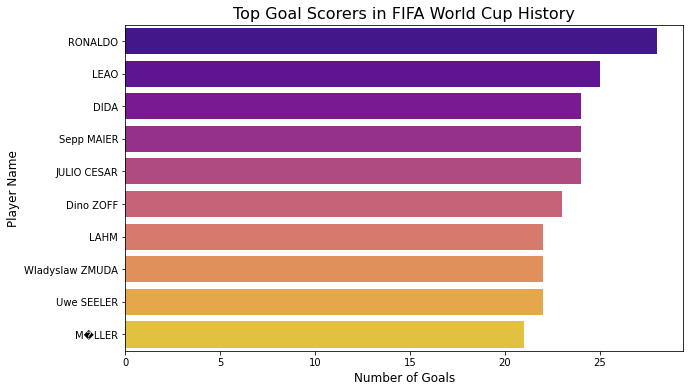

In [10]:
# 5. Top Goal Scorers
# Extract goal events from players_data
goal_events = players_data[players_data['Event'].str.contains('G', na=True)]
top_scorers = goal_events['Player Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="plasma")
plt.title("Top Goal Scorers in FIFA World Cup History", fontsize=16)
plt.xlabel("Number of Goals", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.show()